In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('mean-relative-humidity-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_wind_speed,mean_air_temperature,percentage_possible_sunshine,total_sunshine_duration,solar_radiation,mean_relative_humidity
0,Jan-10,90.0,5.0,16.8,28,92.7,9.1,67
1,Feb-10,276.5,5.6,18.3,22,69.5,9.2,77
2,Mar-10,41.5,5.8,19.9,36,134.9,14.2,71
3,Apr-10,219.0,5.4,21.2,21,81.3,13.4,76
4,May-10,574.5,5.1,23.8,27,111.8,14.8,79


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.8146058058799709


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[65.152114   70.75154832 69.464702   77.67998596 81.092592   83.3227843
 83.94105609 81.08199135 75.54262916 77.2149745  70.4970598  63.44719567
 64.39883884 67.86215379 69.62102625 69.51613337 81.68585853 80.81249133
 77.75936255 79.79353921 75.38085592 75.82518665 75.51784076 67.34729666
 67.61622933 69.62518681 70.07837465 77.4562871  78.58366234 83.27679036
 76.82565009 82.88733475 77.93620164 71.12787273 69.19113533 65.94327788
 64.92991615 67.28162684 69.78845275 75.70526299 83.41000246 78.69533964
 75.50699901 77.29207042 75.99154744 74.35235103 68.48374019 65.33907908
 60.64989496 70.50834082 70.15770163 73.0112855  80.27727953 82.84414168
 80.25908077 79.54767632 74.64782864 71.90657828 68.82173557 65.83028344
 64.03589213 65.73668821 69.82361896 75.72034008 79.45213037 78.22189456
 81.11930104 81.26733442 74.93092265 71.41352287 69.87441703 66.95969931
 67.11371417 67.92384199 70.3191854  78.68252913 79.81259517 80.88848565
 78.39309215 77.30238641 81.428

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 2.326346182042196
Mean Squared Error: 7.869352685151354
Root Mean Squared Error: 2.8052366540367597


Text(0.5, 1.0, 'Mean relative humidity - actual and predicted values')

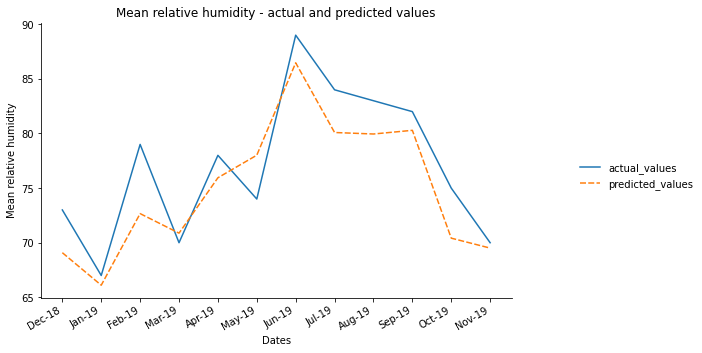

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Mean relative humidity') #set the label for the y-axis
plt.title('Mean relative humidity - actual and predicted values') #set the title of the graph